# Per frequency band PSNRs

In [1]:
import helpers
import numpy as np
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

cmap = 'turbo'

## Testing bandpass filter

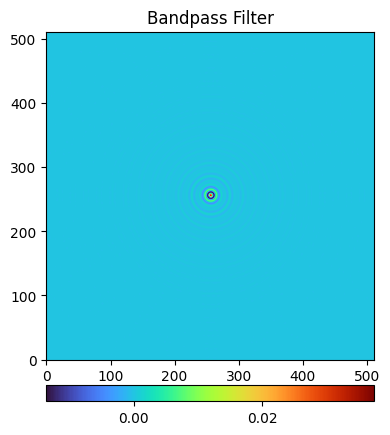

In [2]:
gt = helpers.readFits("../data/SGRA_full_gt.fits")
bpfilter = helpers.bandpass(gt, 50, 75)
helpers.plotNImages([bpfilter], ["Bandpass Filter"], cmap=cmap)

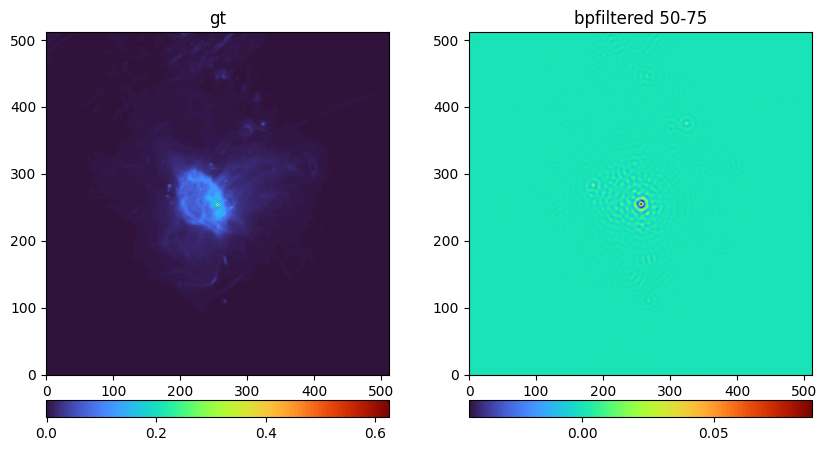

In [3]:
matplotlib.rcParams['figure.figsize'] = [10, 5]

gtfiltered = signal.fftconvolve(gt, bpfilter, mode='same')
helpers.plotNImages([gt, gtfiltered], ["gt", "bpfiltered 50-75"], cmap=cmap)

## Setup bands we will test for

In [4]:
bands = []
step = 5
for i in range(0, 255, step):
    bands.append((i, i + step - 1))
    
nmaj_iter = 5

colors = plt.cm.viridis(np.linspace(0,1,len(bands)))

## Load and compute

In [5]:
dataset = "SGRA"

gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
lmult = 2
cut = 20
hw = 5
weighting = "uniform"

path = "../results/cut_results/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/bphigh/lambda_m" + str(lmult)
        
data = helpers.banded_psnrs(path, gt, bands, nmaj_iter)

data_shifted = []

for x in data:
    firstval = x[1]
    data_shifted.append([val - firstval for val in x[1:]])

In [6]:
pd.DataFrame(data)

,0,1,2,3,4,5
0,"low=0, high=4",26.144327,26.146938,26.146938,26.146938,26.146938
1,"low=5, high=9",30.434988,30.461144,30.461144,30.461144,30.461144
2,"low=10, high=14",32.442950,32.650677,32.650677,32.650677,32.650677
3,"low=15, high=19",20.754225,21.193389,21.193389,21.193389,21.193389
4,"low=20, high=24",14.634901,14.968436,14.968436,14.968436,14.968436
5,"low=25, high=29",13.185963,13.542851,13.542851,13.542851,13.542851
6,"low=30, high=34",11.511559,11.723744,11.723744,11.723744,11.723744
7,"low=35, high=39",10.845585,11.018172,11.018172,11.018172,11.018172
8,"low=40, high=44",11.064355,11.261037,11.261037,11.261037,11.261037
9,"low=45, high=49",10.351416,10.496429,10.496429,10.496429,10.496429


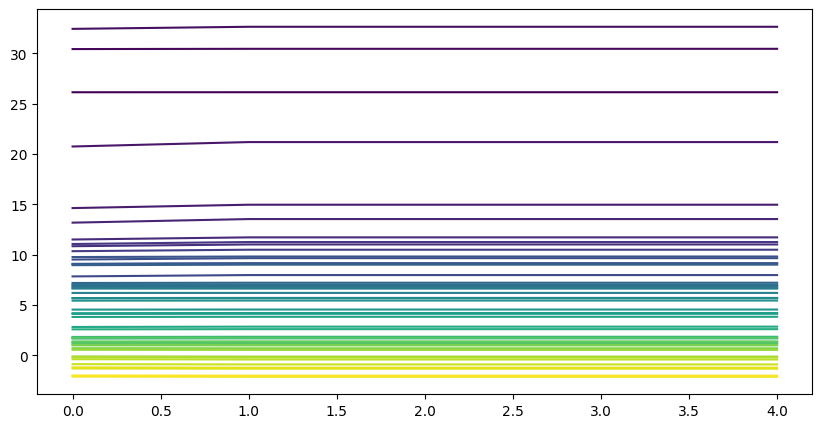

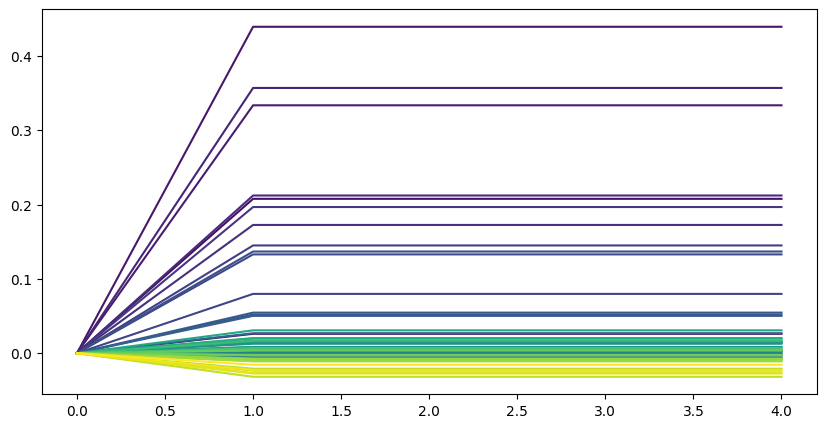

In [7]:
for i, band in enumerate(data):
    plt.plot(range(0, 5), band[1:], color=colors[i])
    
plt.show()

for i, band in enumerate(data_shifted):
    plt.plot(range(0, 5), band, color=colors[i])
    
plt.show()

## Per bandpass PSNRs against dirty image and lowres constraint

In [8]:
dataset = "SGRA"

lmult = 2
cut = 20
hw = 5

path = "../results/cut_results/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/bphigh/lambda_m" + str(lmult)

data_low, data_high = helpers.banded_psnrs_lowresdirty(path, bands, cut, hw, nmaj_iter)

data_low_shifted = []
data_high_shifted = []
    
for x in data_low:
    firstval = x[1]
    shifted = [val - firstval for val in x[1:]]
    data_low_shifted.append(shifted)
    
for x in data_high:
    firstval = x[1]
    shifted = [val - firstval for val in x[1:]]
    data_high_shifted.append(shifted)

In [9]:
pd.DataFrame(data_low)

,0,1,2,3,4,5
0,"low=0, high=4",66.581500,68.074453,68.074453,68.074453,68.074453
1,"low=5, high=9",52.015305,52.354078,52.354078,52.354078,52.354078
2,"low=10, high=14",43.908885,44.377786,44.377786,44.377786,44.377786
3,"low=15, high=19",21.611857,22.042769,22.042769,22.042769,22.042769
4,"low=20, high=24",14.140283,14.432351,14.432351,14.432351,14.432351


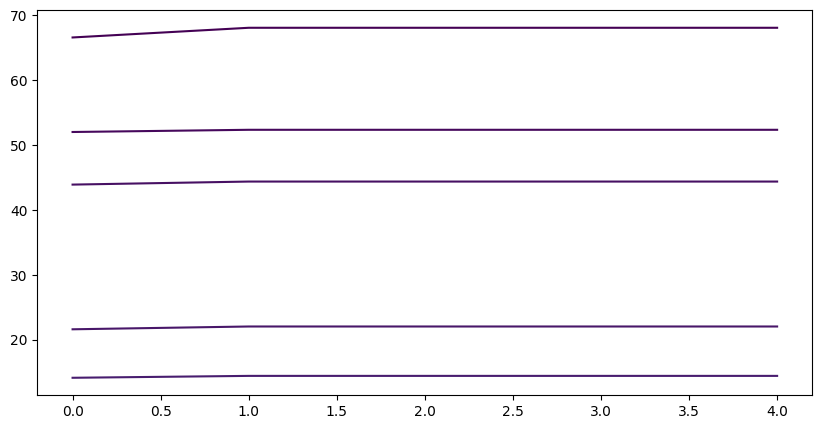

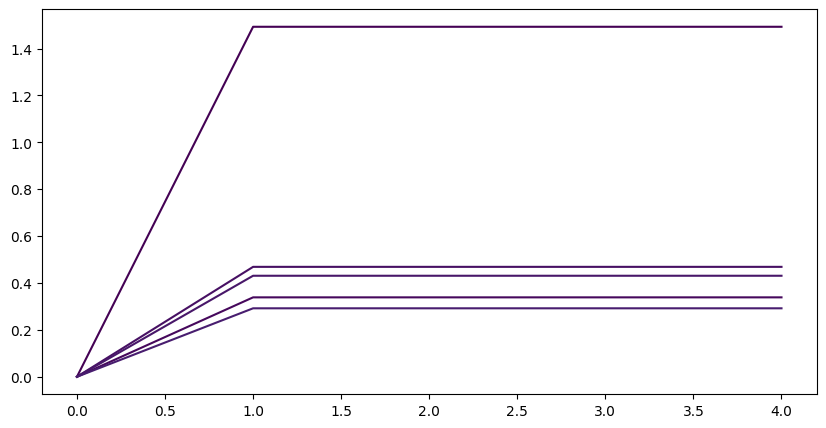

In [10]:
for i, band in enumerate(data_low):
    plt.plot(range(0, 5), band[1:], color=colors[i])
    
plt.show()

for i, band in enumerate(data_low_shifted):
    plt.plot(range(0, 5), band, color=colors[i])
    
plt.show()

In [11]:
pd.DataFrame(data_high)

,0,1,2,3,4,5
0,"low=15, high=19",18.092440,18.280792,18.280792,18.280792,18.280792
1,"low=20, high=24",14.149546,14.366902,14.366902,14.366902,14.366902
2,"low=25, high=29",12.082688,12.297707,12.297707,12.297707,12.297707
3,"low=30, high=34",10.764546,10.907841,10.907841,10.907841,10.907841
4,"low=35, high=39",9.365242,9.453689,9.453689,9.453689,9.453689
5,"low=40, high=44",8.996152,9.076731,9.076731,9.076731,9.076731
6,"low=45, high=49",8.182489,8.265697,8.265697,8.265697,8.265697
7,"low=50, high=54",6.497375,6.548077,6.548077,6.548077,6.548077
8,"low=55, high=59",6.093896,6.146828,6.146828,6.146828,6.146828
9,"low=60, high=64",5.559778,5.586455,5.586455,5.586455,5.586455


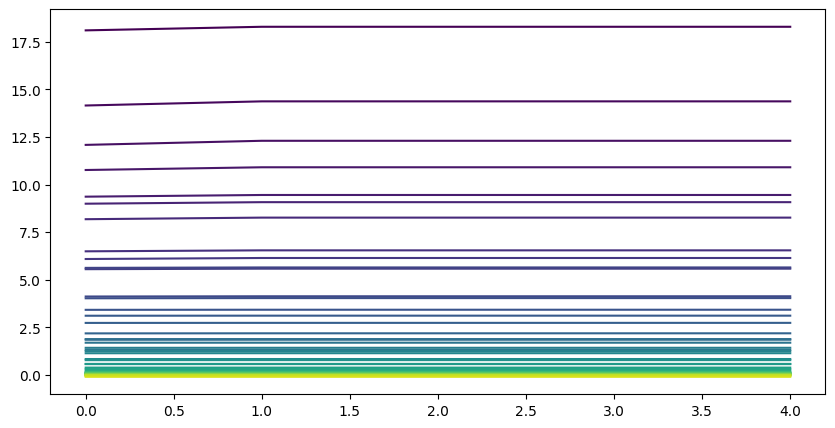

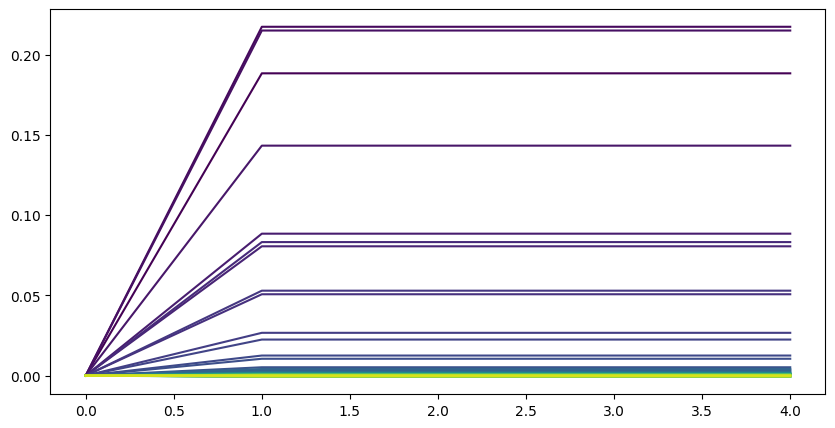

In [12]:
for i, band in enumerate(data_high):
    plt.plot(range(0, 5), band[1:], color=colors[i])
    
plt.show()

for i, band in enumerate(data_high_shifted):
    plt.plot(range(0, 5), band, color=colors[i])
    
plt.show()

## For noiseless datasets

In [13]:
dataset = "SGRA"
gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
lmult = 2
cut = 20
hw = 5
weight = "uniform"

path = "../results/noiseless_cut_results/" + weight + "/" + dataset + "/" + str(cut) + "/" + str(hw) + "hw/high/lambda_m" + str(lmult)

data = helpers.banded_psnrs(path, gt, bands, nmaj_iter)

data_shifted = []

for x in data:
    firstval = x[1]
    data_shifted.append([val - firstval for val in x[1:]])

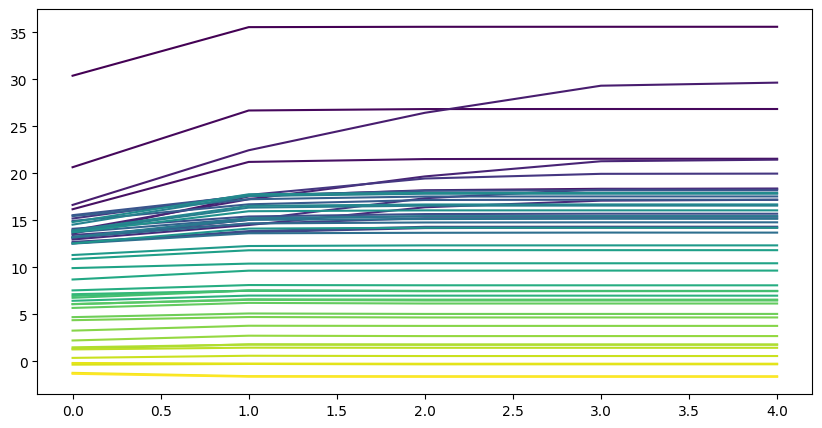

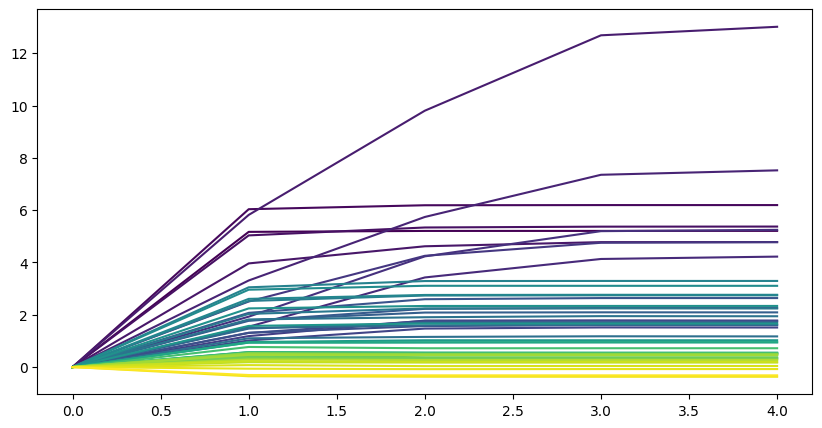

In [14]:
for i, band in enumerate(data):
    plt.plot(range(0, 5), band[1:], color=colors[i])
    
plt.show()

for i, band in enumerate(data_shifted):
    plt.plot(range(0, 5), band, color=colors[i])
    
plt.show()

## For a full-resolution reconstruction using all visibilities

In [15]:
dataset = "SGRA"
gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")

path = "../results/cut_results/full_recons/" + dataset + "/"
data = helpers.banded_psnrs(path, gt, bands, nmaj_iter)

data_shifted = []

for x in data:
    firstval = x[1]
    data_shifted.append([val - firstval for val in x[1:]])

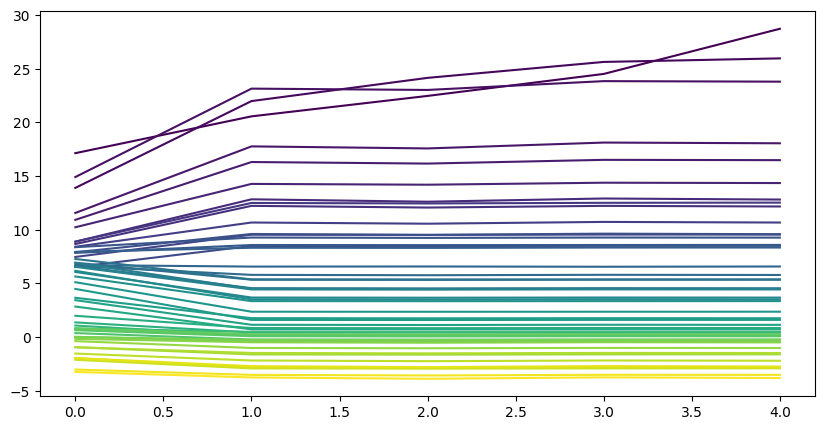

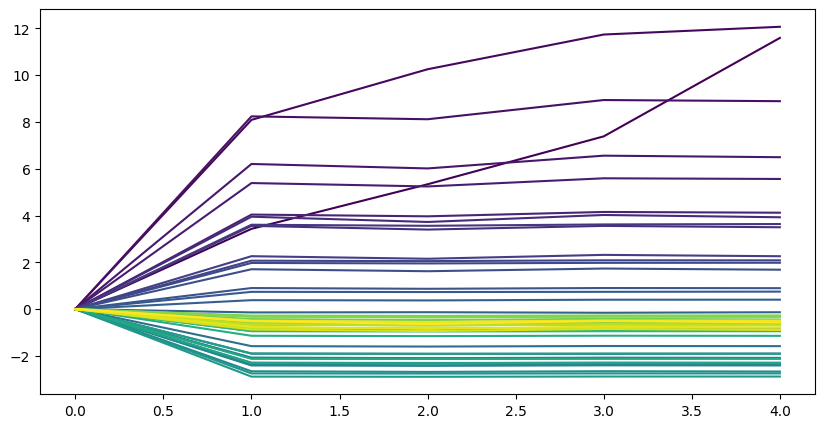

In [16]:
for i, band in enumerate(data):
    plt.plot(range(0, 5), band[1:], color=colors[i])
    
plt.show()

for i, band in enumerate(data_shifted):
    plt.plot(range(0, 5), band, color=colors[i])
    
plt.show()

## For different weightings of low and high

In [17]:
dataset = "SGRA"
gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
lmult = 2
cut = 55
hw = 5
recon_noise_factor = 1000

path = "../results/cut_results/" + dataset + "/" + str(recon_noise_factor) + "/" + str(cut) + "/" + str(hw)\
    + "hw/bphigh/lambda_m" + str(lmult)

data = helpers.banded_psnrs(path, gt, bands, nmaj_iter)

data_shifted = []

for x in data:
    firstval = x[1]
    data_shifted.append([val - firstval for val in x[1:]])

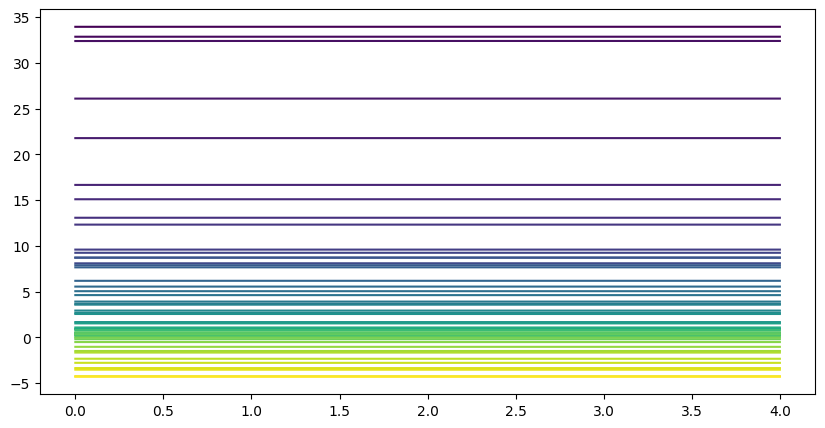

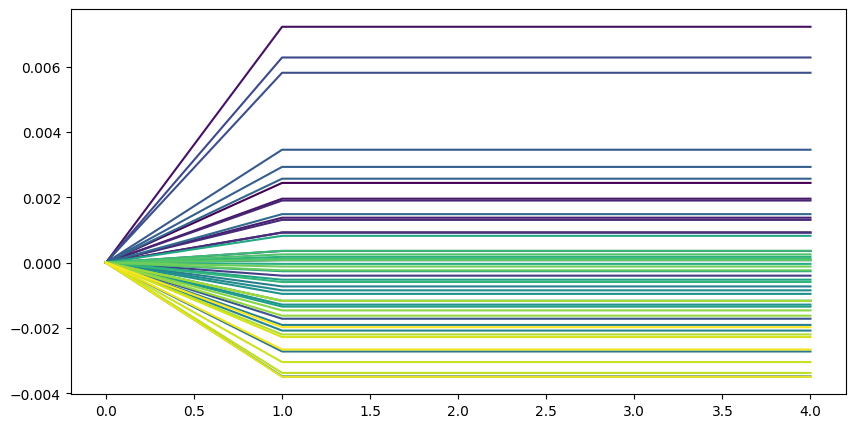

In [18]:
for i, band in enumerate(data):
    plt.plot(range(0, 5), band[1:], color=colors[i])
    
plt.show()

for i, band in enumerate(data_shifted):
    plt.plot(range(0, 5), band, color=colors[i])
    
plt.show()